In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Vérification de la version de numpy (certaines librairies ne marche qu'avec Numpy 1.x.x)

np.__version__

'1.26.4'

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
df = pd.read_csv("flipkart\\flipkart_com-ecommerce_sample_1050.csv")
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [5]:
df["main_category"] = df['product_category_tree'].str.split(" >> ").str[0].str.replace('["', '')
df['main_category'].value_counts()

main_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

In [6]:
def tokenize_bow(sentence:str):
    sentence = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence)
    
    stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

    filtered_w = [w for w in word_tokens if not w in stop_w]
    filtered_w = [w.lower() for w in filtered_w if len(w) > 2]

    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in filtered_w]

    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text


def tokenize_dl(sentence:str):
    sentence = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence)

    filtered_w = [w.lower() for w in word_tokens if len(w) > 2]

    transf_desc_text = ' '.join(filtered_w)
    return transf_desc_text

In [7]:
df['preprocessed_bow'] = [tokenize_bow(s) for s in df['description']]
df['preprocessed_dl'] = [tokenize_dl(s) for s in df['description']]

In [8]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,preprocessed_bow,preprocessed_dl
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,key feature elegance polyester multicolor abst...,key features elegance polyester multicolor abs...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,specification sathiyas cotton bath towel bath ...,specifications sathiyas cotton bath towel bath...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,key feature eurospa cotton terry face towel se...,key features eurospa cotton terry face towel s...
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,key feature santosh royal fashion cotton print...,key features santosh royal fashion cotton prin...
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,key feature jaipur print cotton floral king si...,key features jaipur print cotton floral king s...


In [9]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'preprocessed_bow'
cv_fit = cvect.fit(df[feat])
ctf_fit = ctf.fit(df[feat])

cv_transform = cvect.transform(df[feat])  
ctf_transform = ctf.transform(df[feat])  

In [10]:
from time import perf_counter
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
nums_labels = df['main_category'].nunique()

def ARI_fct(features):
    nums_labels = df['main_category'].nunique()
    time1 = perf_counter()
    tsne = TSNE(n_components=2, perplexity=30, max_iter=2000, 
                init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = KMeans(n_clusters=nums_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(adjusted_rand_score(df['main_category'], cls.labels_),3)
    time2 = np.round(perf_counter() - time1)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, nums_labels, labels, ARI):
    nums_labels = df['main_category'].nunique()
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['main_category'], ax=ax[0])
    ax[0].set_title('Représentation des produits par catégories réelles')
    
    cat_labels = [str(l) for l in labels]
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=cat_labels, ax=ax[1])
    ax[1].set_title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

CountVectorizer : 
-----------------
ARI :  0.421 time :  15.0


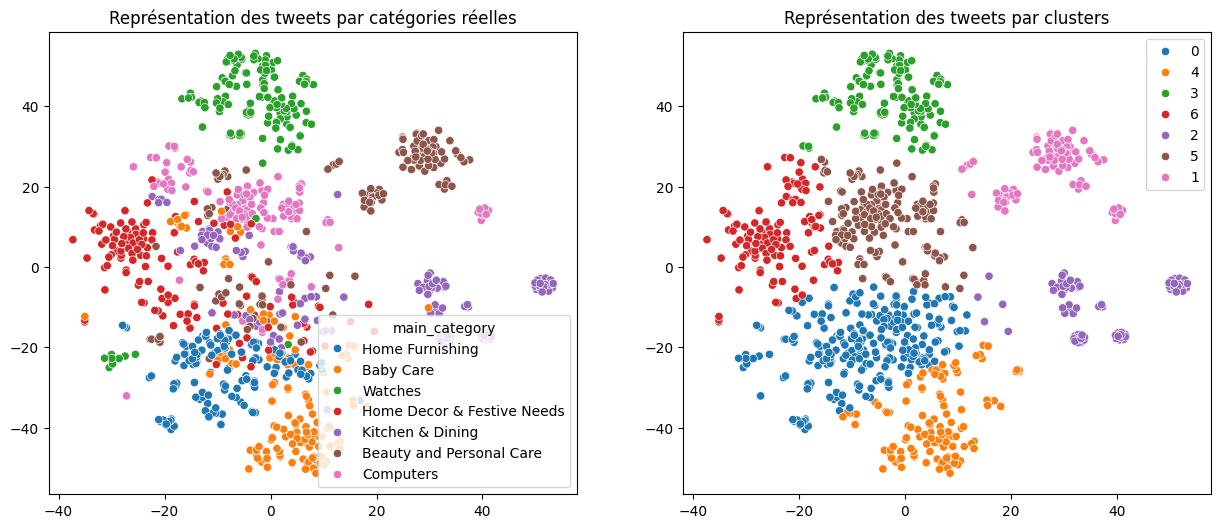

ARI :  0.421


In [12]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
TSNE_visu_fct(X_tsne, nums_labels, labels, ARI)

Tf-idf : 
--------
ARI :  0.42 time :  12.0


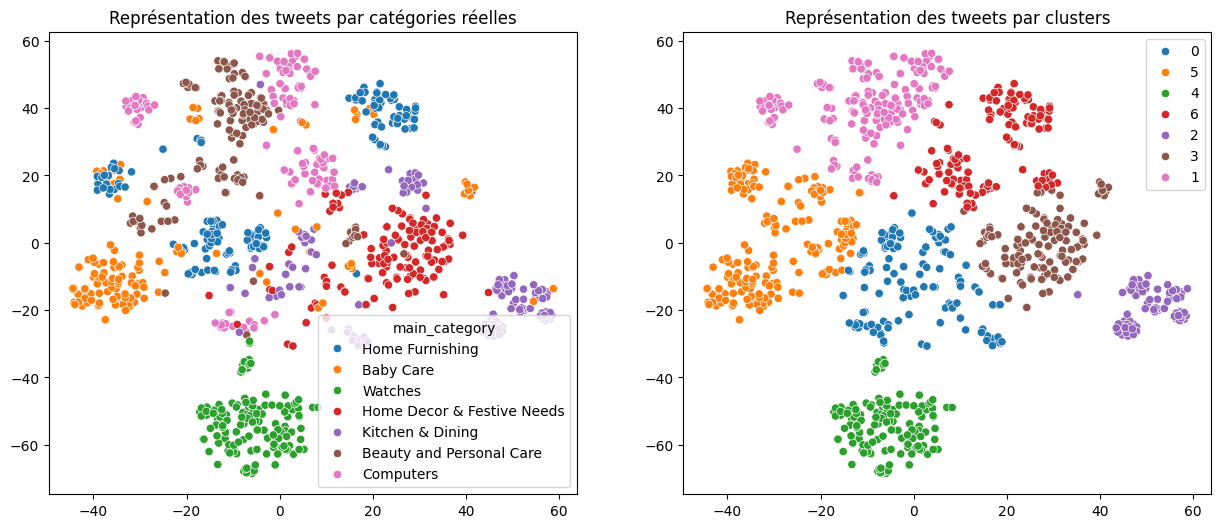

ARI :  0.42


In [13]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)
TSNE_visu_fct(X_tsne, nums_labels, labels, ARI)

Nous pouvons voir que les résultats de notre bag of words sont assez mitigés.

Certains catégories comme `watches`sont bien séparés des autres et présentent peu d'erreurs lors de la clusterisation.

D'autres catégories sont mélangés dans plusieurs clusters, car leurs descriptions ne sont pas assez dictinctes. Nous pouvons voir que le cluster 0 inclus des produits des catégories `computers` `Home decors` `Beauty and personnal care` and more

# Bert

In [14]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import AutoTokenizer, TFAutoModel

os.environ["TF_KERAS"]='1'

c:\Users\apetit\anaconda3\envs\flipkart\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = perf_counter()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(perf_counter() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [16]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['preprocessed_dl'].to_list()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [17]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 625ms/step
temps traitement :  98.0


In [18]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.352 time :  12.0


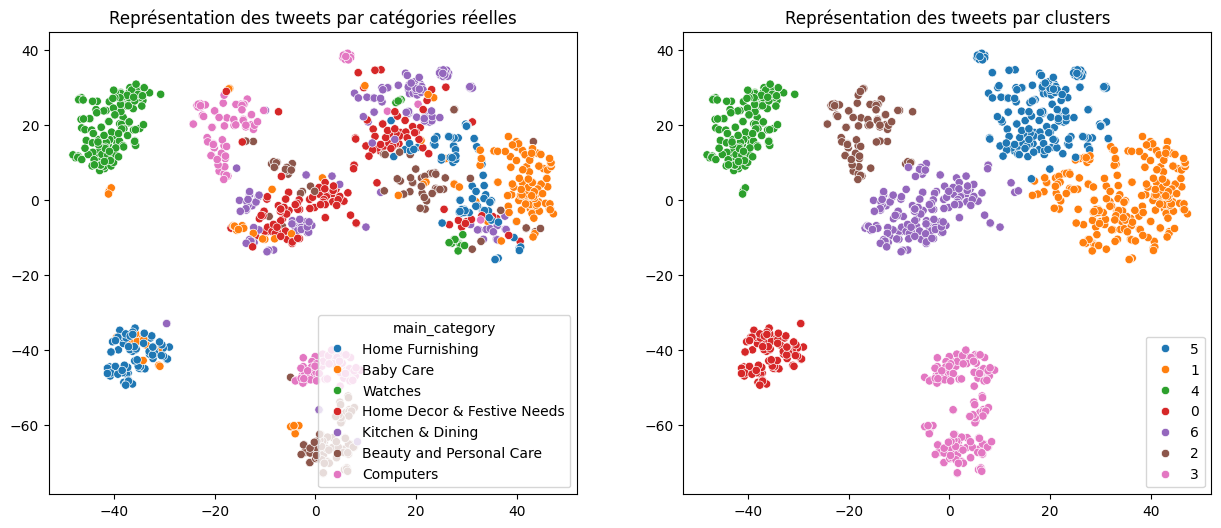

ARI :  0.352


In [19]:
TSNE_visu_fct(X_tsne, nums_labels, labels, ARI)

# Use

In [20]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


os.environ["TF_KERAS"]='1'

In [21]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [22]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = perf_counter()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(perf_counter() - time1)
    return features

In [23]:
batch_size = 10
sentences = df['preprocessed_dl'].to_list()

In [24]:
features_USE = feature_USE_fct(sentences, batch_size)

ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.396 time :  12.0


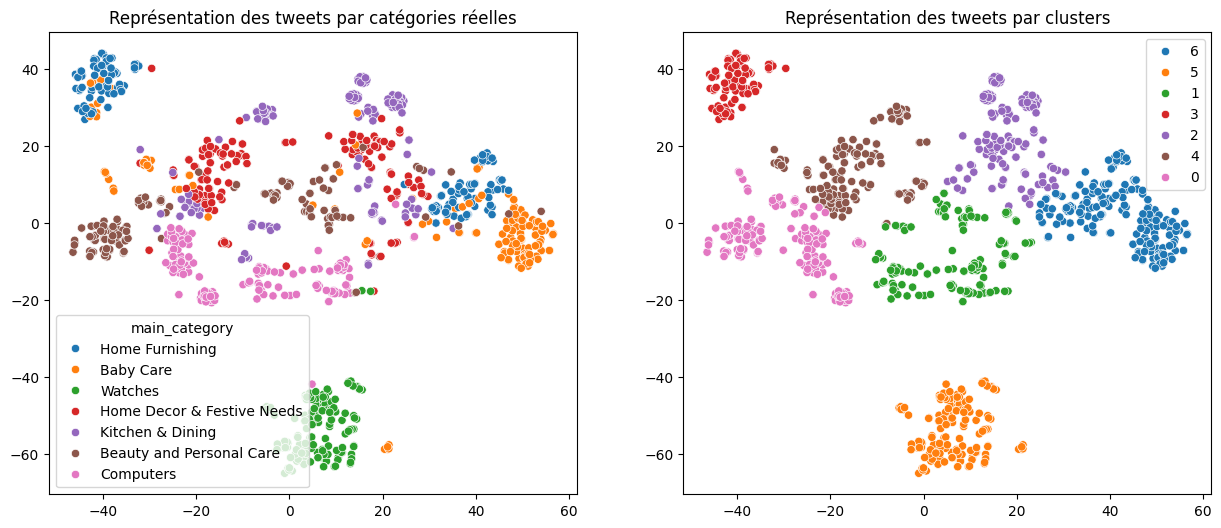

ARI :  0.396


In [25]:
TSNE_visu_fct(X_tsne, nums_labels, labels, ARI)

# Word2Vec

In [26]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [27]:
import gensim

In [28]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 100 # adapt to length of sentences
sentences = [gensim.utils.simple_preprocess(text) for text in df["preprocessed_bow"]]

In [51]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4713
Word2Vec trained


In [52]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4714


In [53]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4714, 300)


In [54]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

c:\Users\apetit\anaconda3\envs\flipkart\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 300)       │     1,414,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 300)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,414,200 (5.39 MB)

 Trainable params: 1,414,200 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\apetit\anaconda3\envs\flipkart\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_1']. Received: the structure of inputs=*
  warnings.warn(


(1050, 300)

In [56]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.303 time :  9.0


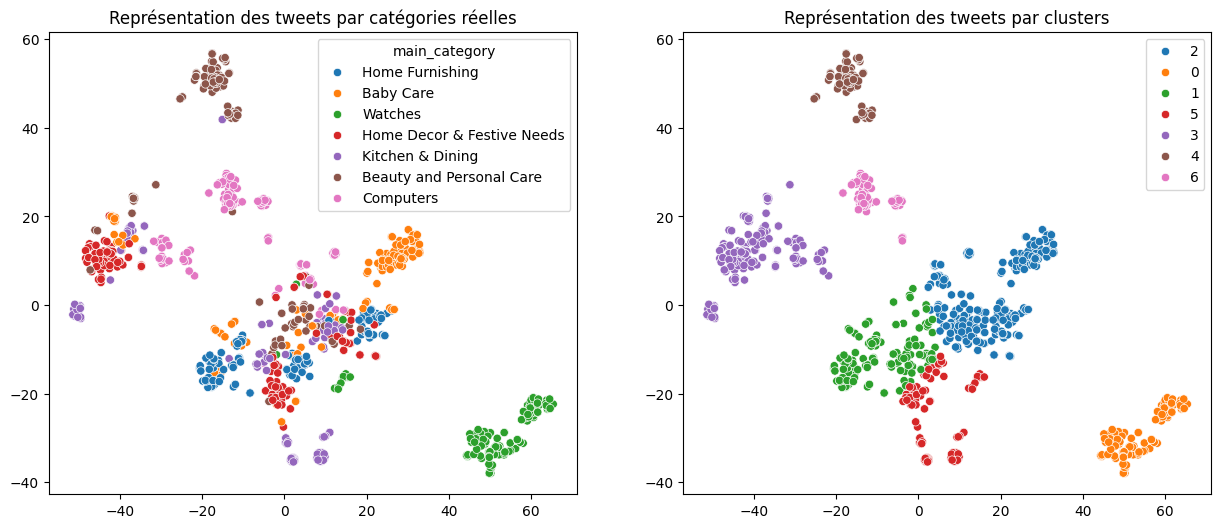

ARI :  0.303


In [58]:
TSNE_visu_fct(X_tsne, nums_labels, labels, ARI)

## FastText

In [29]:
import fasttext
from sklearn.model_selection import train_test_split

df_fast = df[['description', 'main_category']].copy()
df_fast['main_category'] = ["__label__" + text for text in df_fast['main_category']]

df_fast['category_description'] = df_fast['main_category'] + ' ' + df_fast["description"]

train, test = train_test_split(df_fast, test_size=0.2, stratify=df_fast['main_category'])


In [30]:
df_fast.head()

,description,main_category,category_description
0,Key Features of Elegance Polyester Multicolor ...,__label__Home Furnishing,__label__Home Furnishing Key Features of Elega...
1,Specifications of Sathiyas Cotton Bath Towel (...,__label__Baby Care,__label__Baby Care Specifications of Sathiyas ...
2,Key Features of Eurospa Cotton Terry Face Towe...,__label__Baby Care,__label__Baby Care Key Features of Eurospa Cot...
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,__label__Home Furnishing,__label__Home Furnishing Key Features of SANTO...
4,Key Features of Jaipur Print Cotton Floral Kin...,__label__Home Furnishing,__label__Home Furnishing Key Features of Jaipu...


In [31]:
import csv
df_fast.to_csv('preprocessed_text.txt', columns=['category_description'], index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
train.to_csv('ecommerce.train', columns=['category_description'], index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")
test.to_csv('ecommerce.test', columns=['category_description'], index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

In [32]:
fasttxt_model = fasttext.train_supervised(input='ecommerce.train', epoch=25)

In [33]:
fasttxt_model.test('ecommerce.test')

(210, 0.9714285714285714, 0.9714285714285714)

In [34]:
test.head()

,description,main_category,category_description
48,Key Features of AKUP league-of-legends Ceramic...,__label__Kitchen & Dining,__label__Kitchen & Dining Key Features of AKUP...
165,Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...,__label__Kitchen & Dining,__label__Kitchen & Dining Rockmantra Cute Two ...
90,Buy Exotic India Adi Buddha Vajrasattva Showpi...,__label__Home Decor & Festive Needs,__label__Home Decor & Festive Needs Buy Exotic...
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,__label__Baby Care,__label__Baby Care Buy Wallmantra Medium Vinyl...
332,Buy TRENDnet N150 Wireless ADSL 2 Modem Router...,__label__Computers,__label__Computers Buy TRENDnet N150 Wireless ...


In [45]:
y_pred = []

for description in test['description']:
    print(description)
    pred = fasttxt_model.predict(description.replace('\n',''))
    pred_str = pred[0][0].replace('__label__','')
    print(pred_str)
    print()
    
    y_pred.append(pred_str)

y_pred

Key Features of AKUP league-of-legends Ceramic Mug Pack of 1 Mug,AKUP league-of-legends Ceramic Mug (300 ml) Price: Rs. 259 AKUP Ceramic coffee mugs gives you the best quality printed mugs which you can gift to your loved ones. We provide good quality of products with packing. Coffee mugs made of ceramic clay with the volume capacity of 300ml each. You can buy it for yourself to make your moment unforgettable forever. Specifications Product Dimensions: Mugs - Height: 9.5 cms, Diameter: 8 cms. Item Type: Coffee Mug Color: Multi-Color Material: Clay Finish: Glossy Specialty: Lovely Style Wash care: Remove dirt by using a soft fabric to clean and then wipe with a moist cloth. Disclaimer: The fine design, pattern and color tone of the product may vary slightly from that shown in the image. However, there would not be any compromise in quality. Brand: AKUP designs & co,Specifications of AKUP league-of-legends Ceramic Mug (300 ml) General Type Mug Mug Capacity 300 ml Material Ceramic Freezer

In [48]:
ari_fast = round(adjusted_rand_score(y_pred, test['main_category']),2)
ari_fast

0.42